# Setup and Config

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/<path to uploaded repo>"

In [5]:
# Import visual libraries
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Compile and Run

In [43]:
#@title Compile and run the parallel program
# Compile
! mpicc DLA.c -o DLA.out

# Run with number process == 8
! mpirun --allow-run-as-root --oversubscribe -np $8 DLA.out

Start process 3
Start process 6
Start process 0
Start process 1
Start process 4
Start process 5
Start process 2
Start process 7
Process 3, output path: output/3.txt
Process 6, output path: output/6.txt
Process 1, output path: output/1.txt
Process 5, output path: output/5.txt
Process 4, output path: output/4.txt
Process 0, output path: output/0.txt
Process 2, output path: output/2.txt
Process 7, output path: output/7.txt
Process 0, exporting output to: output/0.txt
Process 4, exporting output to: output/4.txt
Process 6, exporting output to: output/6.txt
Process 2, exporting output to: output/2.txt
Process 3, exporting output to: output/3.txt
Process 5, exporting output to: output/5.txt
Process 7, exporting output to: output/7.txt
Process 1, exporting output to: output/1.txt


Appending 0.txt
Appending 1.txt
Appending 2.txt
Appending 3.txt
Appending 4.txt
Appending 5.txt
Appending 6.txt
Appending 7.txt


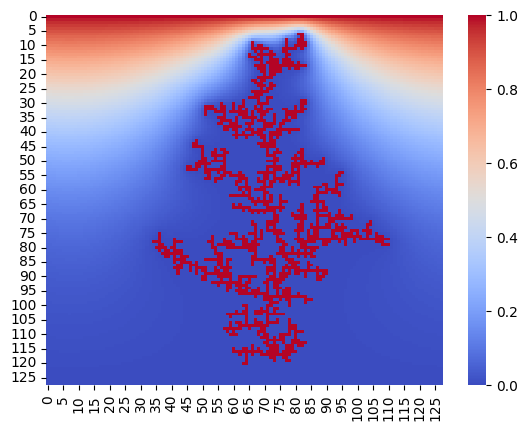

In [44]:
#@title Display the output
# Output concatenation
results = []
for f in sorted(os.listdir('output')):
    if ".txt" not in f:
      continue
    print(f"Appending {f}")
    lines = open(os.path.join('output', f), 'r').readlines()
    for line in lines:
        results.append([float(x) for x in line.split('\t')[:-1]])

# Visualization by heatmap
heatMap = sns.heatmap(results, cmap='coolwarm')

# Save heatmap
plt.savefig('output/DLA-heatmap.png', format='png')